<div>
<h1>DFT: Fase</h1> 
</div>

<p>
El calculo de la transformada de Fourier discreta resulta en valores complejos de los coeficientes de Fourier, cada uno representado por una componente de magnitud y otra de fase. De acuerdo a la Seccion 2.3.2 de <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, tratamos en este cuaderno el rol de la componente de fase.
</p> 

## Representacion Polar de los coeficientes de Fourier 

Sea $x=(x(0), x(1), ..., x(N-1))$ una señal con muestras $x(n)\in\mathbb{R}$ para $n\in[0:N-1]$. El coeficiente de Fourier complejo $c_k:=X(k)\in\mathbb{C}$ para $k\in[0:N-1]$, calculado por medio de la [transformada de Fourier discreta (DFT)](./C2_03_DFT-FFT.ipynb), esta dado por:

$$ 
c_k :=X(k) = \sum_{n=0}^{N-1} x(n) \exp(-2 \pi i k n / N). 
$$

Consideremos $c_k = a_k + i b_k$ con parte real $a_k\in\mathbb{R}$ y parte imaginaria $b_k\in\mathbb{R}$. Recordemos del [cuaderno FMP sobre numeros complejos](./C2_01_ComplexNumbers.ipynb) que el **valor absoluto** se define por:

$$|c_k| := \sqrt{a_k^2 + b_k^2}$$

y el **angulo** (dado en radianes) por:

$$\gamma_k := \mathrm{angle}(c_k) := \mathrm{atan2}(b_k, a_k) \in [0,2\pi).$$

Usando la [funcion exponencial](./C2_02_ExponentialFunction.ipynb), esto conduce a la **representacion en coordenada polar**:

$$
    c_k = |c_k| \cdot \mathrm{exp}(i \gamma_k).
$$

## Propiedad Optimal

Sea $\mathbf{cos}_{k,\varphi}:[0:N-1]\to\mathbb{R}$ una sinusoide muestreada con parametro de frecuencia $k$ y fase $\varphi\in[0,1)$, definida por:

$$
   \mathbf{cos}_{k,\varphi}(n) = \sqrt{2}\mathrm{cos}\big( 2\pi (kn/N - \varphi) \big)
$$

para $n\in[0,N-1]$. De manera intuitiva, al calcular la transformada de Fourier para alguna señal discreta $x$ de longitud $N$ y para algun parametro de frecuencia $k$, se determina el producto interno (un tipo de correlacion) entre la señal $x$ y la sinusoide $\mathbf{cos}_{k,\varphi_k}$. La fase $\varphi_k$ posee la propiedad remarcable de maximizar la correlacion entre $x$ y todas las posibles sinusoides $\mathbf{cos}_{k,\varphi}$ con $\varphi\in[0,1)$. En otras palabras:

$$
     \varphi_k  = \mathrm{argmax}_{\varphi\in[0,1)} \langle x | \mathbf{cos}_{k,\varphi} \rangle. 
$$

El coeficiente de Fourier complejo $X(k)$ codifica esta fase optima, la cual esta dada basicamente por el angulo del numero complejo. Mas precisamente, siendo $\gamma_k$ el angulo de $X(k)$, entonces es posible mostrar que la fase optima $\varphi_k$ esta dada por:

$$
      \varphi_k := - \frac{\gamma_k}{2 \pi}.
$$

En la siguiente celda de codigo, demostramos esta propiedad optimal.

Sinusoid with phase from Fourier coefficient resulting in an optimal correlation.


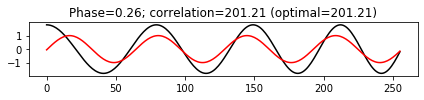

Sinusoid with an arbitrary phase resulting in a medium correlation.


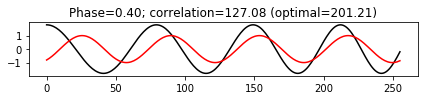

Sinusoid with a phase that yields a correlation close to zero.


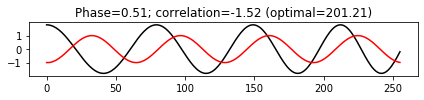

In [8]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

# Generate a chirp-like test signal (details not important)
N = 256
t_index = np.arange(N)
x = 1.8*np.cos(2*np.pi*(3*(t_index*(1+t_index/(4*N)))/N))

k = 4
exponential = np.exp(-2*np.pi*1j*k*t_index/N)
X_k = np.sum(x*exponential)
phase_k = - np.angle(X_k)/(2*np.pi)

def compute_plot_correlation(x, N, k, phase):
    sinusoid = np.cos(2*np.pi*(k*t_index/N-phase)) 
    d_k = np.sum(x*sinusoid)
    plt.figure(figsize=(6,1.5))
    plt.plot(t_index, x, 'k')
    plt.plot(sinusoid, 'r')
    plt.title('Phase=%0.2f; correlation=%0.2f (optimal=%0.2f)' % (phase, d_k, np.abs(X_k)))
    plt.tight_layout()
    plt.show()

print('Sinusoid with phase from Fourier coefficient resulting in an optimal correlation.')    
compute_plot_correlation(x, N, k, phase=phase_k)

print('Sinusoid with an arbitrary phase resulting in a medium correlation.')  
compute_plot_correlation(x, N, k, phase=0.4)

print('Sinusoid with a phase that yields a correlation close to zero.')  
compute_plot_correlation(x, N, k, phase=0.51)

In [4]:
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())